* **If smth fails, try resetting session/terminating!**

* **Executing consequently 1,2,3 and restarting works**

### Plans & Ideas
* use a part of the data
* sPlot weights as a new feature
  * doesn't make any sense in search for an unlnown signal, but might be useful in reducing bkgr
* uniformity over bkgr
  * handmade losses to prevent similarities between sig and bkgr mass distribution
  * checking it with tests
* weighted AUC
* Focal Loss - https://arxiv.org/abs/1708.02002
* something from tau->3mu
* play with nB (does it affect smth?)
* calibration
* dR antimatching as bkgr samples


### **pip libraries**

In [0]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/test')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install numpy -U
!pip install pandas -U
!pip install seaborn -U
!pip install lightgbm -U

    100% |████████████████████████████████| 17.3MB 2.3MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.2 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


    100% |████████████████████████████████| 10.1MB 4.5MB/s 
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.2 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


    100% |████████████████████████████████| 215kB 27.5MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


Requirement already up-to-date: lightgbm in /usr/local/lib/python3.6/dist-packages (2.2.3)


In [3]:
!pip install shap -U
!pip install gpyopt
!pip install sobol_seq
# !pip install hep_ml -U

    100% |████████████████████████████████| 225kB 12.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/bf/26/bd/912db1314f1cef0171d9b7f128dd01e8b8c92ed8d0062e632d
Successfully built shap
    100% |████████████████████████████████| 61kB 4.1MB/s 
    100% |████████████████████████████████| 880kB 22.5MB/s 
    100% |████████████████████████████████| 71kB 21.7MB/s 
  Stored in directory: /root/.cache/pip/wheels/33/1d/87/dc02440831ba986b1547dd11a7dcd44e893b0527083066d869
  Stored in directory: /root/.cache/pip/wheels/97/82/1d/32a361e1ff2b4d9129a60343831dd99cdc74440e2db1c55264
  Stored in directory: /root/.cache/pip/wheels/a9/fc/74/3bbd263c43ed98d67343df24cebf0a0ee34afee40d769fda9c
Successfully built gpyopt GPy paramz
  Stored in directory: /root/.cache/pip/wheels/d5/72/1f/6cd8a0b472da802ee9c84fdc39626bb4ec544668c030917d9f
Successfully built sobol-seq


#### pytorch

In [0]:
# from os import path
# from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
# platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

# accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

# !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
# import torch
# print(torch.__version__)
# print(torch.cuda.is_available())

    100% |████████████████████████████████| 484.0MB 34.8MB/s 
    100% |████████████████████████████████| 2.0MB 11.2MB/s 
fastai 1.0.43 has requirement torch>=1.0.0, but you'll have torch 0.4.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
0.4.0
True


In [4]:
# from pytorch install webpage

!pip install https://download.pytorch.org/whl/cu80/torch-1.0.1.post2-cp36-cp36m-linux_x86_64.whl
!pip install torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

    100% |████████████████████████████████| 2.0MB 1.7MB/s 
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


1.0.1.post2
True


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import graphviz
import itertools

from IPython.display import Image        

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, tree, ensemble
from sklearn.preprocessing import scale, StandardScaler, PolynomialFeatures
from sklearn import utils
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, auc, classification_report, matthews_corrcoef, log_loss

import lightgbm as lgb
# import shap

# from hep_ml import uboost, gradientboosting as ugb, losses

# import pyDOE
%pylab inline  

sns.__version__


import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import Subset

# from ignite.contrib.handlers import ProgressBar
# from ignite.engine import Engine, Events, create_supervised_trainer, create_supervised_evaluator
# from ignite.handlers import ModelCheckpoint, Timer, EarlyStopping
# from ignite.metrics import RunningAverage, Accuracy, Loss
# from ignite.contrib.handlers.param_scheduler import LinearCyclicalScheduler, CosineAnnealingScheduler 

# import visdom 

import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization

import matplotlib.pyplot as plt
%matplotlib inline

# !pip install livelossplot
# from livelossplot import PlotLosses

from tqdm import tqdm_notebook

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
print(device)

Populating the interactive namespace from numpy and matplotlib
True
cuda:0


In [3]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/test')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Getting data**

In [4]:
MC   = pd.read_pickle('MC_pair_dR_psi_renamed.pkl')
# data    = pd.read_pickle('data_B0_e3de87.pkl')
data    = pd.read_pickle('data_B0_e3de87_nB_4000.pkl')
data = data.set_index([pd.Series(range(data.shape[0]))]) # removing str labels

MC_vars = ["dR_mu1", "dR_mu2", "dR_pi1", "dR_pi2", "dR_K1", "dR_K2",
           "dR_mu1_vv", "dR_mu2_vv", "dR_pi1_vv", "dR_pi2_vv", "dR_K1_vv", "dR_K2_vv",
           'gen_phi_mass', 'delta_phi_mass',
           "BU_reflmass1_Cjp", "BU_reflmass2_Cjp"] 

MC.shape, data.shape

((230149, 50), (183406, 34))

In [0]:
dR_match = 0.01
matching_mask = ((MC[['dR_mu1', 'dR_mu1_vv']].min(axis=1) < dR_match) & (MC[['dR_mu2', 'dR_mu2_vv']].min(axis=1) < dR_match) & (MC[['dR_pi1', 'dR_pi1_vv']].min(axis=1) < dR_match) &
                 (MC[['dR_pi2', 'dR_pi2_vv']].min(axis=1) < dR_match) & (MC[['dR_K1', 'dR_K1_vv']].min(axis=1) < dR_match) & (MC[['dR_K2', 'dR_K2_vv']].min(axis=1) < dR_match))
signal = MC[matching_mask]

#---#
B_window = 0.05; #left_sdbd_dist = 5.366 - 5.25 - B_window
mass_mask_for_bkgr = np.array([True] * data.shape[0])
mass_mask_for_sig = np.array([True] * signal.shape[0])
sig_window = {'BU_mass_Cjp': [5.366 - B_window, 5.366 + B_window]}

for key, value in sig_window.items():
    mass_mask_for_bkgr &= ((data[key] > value[0] - B_window) & (data[key] < value[0])) | ( (data[key] > value[1]) & (data[key] < value[1] + B_window))
    mass_mask_for_sig &= (signal[key] > value[0]) & (signal[key] < value[1])

bkgr = data[mass_mask_for_bkgr]
signal = signal[mass_mask_for_sig]


In [6]:
signal.shape

(84553, 50)

### **Define final dataframe for training**

In [7]:
data.columns

Index(['psi_eta', 'BU_pvdistsignif2_Cjp', 'mu_1_pt', 'PI2_eta', 'BU_pt_Cjp',
       'K1_pt', 'BU_vtxprob_Cjp', 'mu_2_eta', 'phi_eta', 'BU_mass_Cjp',
       'phi_pt', 'BU_pvdistsignif3_Cjp', 'nB', 'mu_2_pt', 'JP_pt',
       'JPSI_pvcos2_Cmumu', 'K2_eta', 'JPSI_vtxprob_Cmumu', 'K2_pt',
       'JPSI_pvdistsignif2_Cmumu', 'JPSI_mass_Cmumu', 'psi_pt', 'PI2_pt',
       'BU_eta_Cjp', 'PHI_mass_Cjp', 'psi_mass_Cjp', 'mu_1_eta', 'K1_eta',
       'BU_pvcos2_Cjp', 'PI1_pt', 'PI1_eta', 'PV_bestBang_RF_CL', 'JP_eta',
       'PIPI_mass_Cjp'],
      dtype='object')

In [0]:
drop_vars = [] # ['nB']
drop_masses = ['BU_mass_Cjp', 'PHI_mass_Cjp', 'psi_mass_Cjp', 'PIPI_mass_Cjp'] # , 'PHI_mass_Cjp', 'psi_mass_Cjp', 'PIPI_mass_Cjp'


signal = signal.drop(drop_vars + MC_vars, axis=1, inplace=False)
bkgr = bkgr.drop(drop_vars, axis=1, inplace=False)[signal.columns]

In [9]:
print(f'Signal shape: {signal.shape[0]}\nBkgr shape: {bkgr.shape[0]}')

Signal shape: 84553
Bkgr shape: 37229


In [10]:
min_shape = min(bkgr.shape[0], signal.shape[0])

bkgr = utils.shuffle(bkgr, random_state=123)[:min_shape] 
signal = utils.shuffle(signal, random_state=123)[:min_shape] 

### make target labels and append sig with bkgr
bkgr['target'] = [0]*bkgr.shape[0]
signal['target'] = [1]*signal.shape[0]
df = bkgr.append(signal)


print('Sig/bkgr shapes:', signal.shape, bkgr.shape)
print('Dataframe shape:', df.shape)
# print('\nNow better')

Sig/bkgr shapes: (37229, 35) (37229, 35)
Dataframe shape: (74458, 35)


 ### **Drop nan, shuffle and split into X (features) and y (targets)**

In [0]:
# print ('Nan indices:\n ', np.argwhere(np.isnan(df.values)), '\n', sum(np.isnan(df.values)))
df = df.dropna(inplace=False) 

df = utils.shuffle(df, random_state=123)
X = df.iloc[:, :-1]
y = df['target']

In [12]:
print(f'NaNs in features:\n{df.columns[3]}, {df.columns[17]}')

NaNs in features:
psi_pt, K2_eta


### **Train / Test split**

In [0]:
(X_traval, X_test, y_traval, y_test) = train_test_split(X, y,
                                     test_size=0.2, 
                                     random_state=123, stratify=y)

(X_train, X_val, y_train, y_val) = train_test_split(X_traval, y_traval,
                                     test_size=0.25, 
                                     random_state=123, stratify=y_traval)

train_masses = X_train[['BU_mass_Cjp', 'PHI_mass_Cjp', 'psi_mass_Cjp']]
X_train = X_train.drop(columns=drop_masses)

test_masses = X_test[['BU_mass_Cjp', 'PHI_mass_Cjp', 'psi_mass_Cjp']]
X_test = X_test.drop(columns=drop_masses)

val_masses = X_val[['BU_mass_Cjp', 'PHI_mass_Cjp', 'psi_mass_Cjp']]
X_val = X_val.drop(columns=drop_masses)

X_train = np.array(X_train, dtype='float64')
X_test = np.array(X_test, dtype='float64')
X_val = np.array(X_val, dtype='float64')

y_train = np.array(y_train, dtype='int')
y_test = np.array(y_test, dtype='int')
y_val = np.array(y_val, dtype='int')

In [14]:
X_val[5]

array([57.47633934,  6.17794593,  1.40427627, 13.74554346, 16.62144523,
        1.6534085 ,  0.1413883 ,  1.60210319,  1.34260039,  2.88873946,
       72.57888096,  2.        ,  5.15920458, 11.0359782 ,  0.99999941,
        1.38260844,  0.46248439,  1.25063112,  1.712655  , 49.42395924,
        3.06640172,  0.80747311,  1.69399854,  1.64124031,  1.74080783,
        1.30480812,  0.99995016,  1.92535807,  1.69050186,  0.99352568])

### **LightGBM**

In [15]:
X_train.columns

AttributeError: ignored

In [0]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data  = lgb.Dataset(X_test, label=y_test)

In [0]:
lgb_params = {'seed': 123, 'device': 'cpu',
           'num_leaves': 30, 'max_depth': 10, 'subsample': .8, 'colsample_bytree': .8,
           'learning_rate': 0.01,  'lambda': 0,'min_child_weight': 1
               }

lgb_params['metric'] = ['auc', 'binary_logloss']

In [0]:
num_round = 999
bst = lgb.train(lgb_params, train_data, num_round, early_stopping_rounds=10, valid_sets=[test_data], verbose_eval=20)

Training until validation scores don't improve for 10 rounds.
[20]	valid_0's binary_logloss: 0.586872	valid_0's auc: 0.957979
[40]	valid_0's binary_logloss: 0.508467	valid_0's auc: 0.959496
[60]	valid_0's binary_logloss: 0.45318	valid_0's auc: 0.960919
[80]	valid_0's binary_logloss: 0.409076	valid_0's auc: 0.962109
[100]	valid_0's binary_logloss: 0.375077	valid_0's auc: 0.96286
[120]	valid_0's binary_logloss: 0.347287	valid_0's auc: 0.963599
[140]	valid_0's binary_logloss: 0.324355	valid_0's auc: 0.964303
[160]	valid_0's binary_logloss: 0.307485	valid_0's auc: 0.964964
[180]	valid_0's binary_logloss: 0.29214	valid_0's auc: 0.965724
[200]	valid_0's binary_logloss: 0.279714	valid_0's auc: 0.966312
[220]	valid_0's binary_logloss: 0.269029	valid_0's auc: 0.966957
[240]	valid_0's binary_logloss: 0.259595	valid_0's auc: 0.967591
[260]	valid_0's binary_logloss: 0.251349	valid_0's auc: 0.968188
[280]	valid_0's binary_logloss: 0.244767	valid_0's auc: 0.968694
[300]	valid_0's binary_logloss: 0.2

In [0]:
prediction_test = bst.predict(X_test)
prediction_train = bst.predict(X_train)

### pytorch net

In [0]:
n_in = X_train.shape[1]
n_out = np.unique(y_train).shape[0]
n_hidden = 200

In [0]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        m.bias.data.fill_(0.01)

In [41]:
model = nn.Sequential()

# dense "head"
model.add_module('batch0', nn.BatchNorm1d(n_in))
model.add_module('dense1', nn.Linear(n_in, n_hidden))
model.add_module('batch1', nn.BatchNorm1d(n_hidden))
# model.add_module('do1', nn.Dropout(p=0.5))
model.add_module('dense1_relu', nn.ReLU())
                 
model.add_module('dense2', nn.Linear(n_hidden, n_hidden))
model.add_module('batch2', nn.BatchNorm1d(n_hidden))
# model.add_module('do2', nn.Dropout(p=0.5))
model.add_module('dense2_relu', nn.ReLU())
                 
# model.add_module('dense3', nn.Linear(n_hidden, n_hidden))
# model.add_module('batch3', nn.BatchNorm1d(n_hidden))
# # model.add_module('do3', nn.Dropout(p=0.5))
# model.add_module('dense3_relu', nn.ReLU())

# model.add_module('dense4', nn.Linear(n_hidden, n_hidden))
# model.add_module('batch4', nn.BatchNorm1d(n_hidden))
# # model.add_module('do4', nn.Dropout(p=0.5))
# model.add_module('dense4_relu', nn.ReLU())

# model.add_module('dense5', nn.Linear(n_hidden, n_hidden))
# model.add_module('batch5', nn.BatchNorm1d(n_hidden))
# model.add_module('do5', nn.Dropout(p=0.5))
# model.add_module('dense5_relu', nn.ReLU())

# model.add_module('dense4', nn.Linear(n_hidden, n_hidden))
# model.add_module('batch4', nn.BatchNorm1d(n_hidden))
# # model.add_module('do2', nn.Dropout(p=0.5))
# model.add_module('dense4_relu', nn.ReLU())

model.add_module('dense5_logits', nn.Linear(n_hidden, n_out))

model.apply(init_weights)
model.cuda()

Sequential(
  (batch0): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dense1): Linear(in_features=30, out_features=200, bias=True)
  (batch1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dense1_relu): ReLU()
  (dense2): Linear(in_features=200, out_features=200, bias=True)
  (batch2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dense2_relu): ReLU()
  (dense5_logits): Linear(in_features=200, out_features=2, bias=True)
)

In [0]:
def compute_loss(X_batch, y_batch):
    X_batch = Variable(torch.FloatTensor(X_batch)).cuda()
    y_batch = Variable(torch.LongTensor(y_batch)).cuda()
    logits = model(X_batch)
    return F.cross_entropy(logits, y_batch).mean()

In [43]:
# # example
compute_loss(X_train[:5], y_train[:5])

tensor(0.3955, device='cuda:0', grad_fn=<MeanBackward1>)

In [0]:
# An auxilary function that returns mini-batches for neural network training
def iterate_minibatches(X, y, batchsize):
    indices = np.random.permutation(np.arange(len(X)))
    for start in range(0, len(indices), batchsize):
        ix = indices[start: start + batchsize]
        yield X[ix], y[ix]

In [0]:
opt = torch.optim.Adam(model.parameters(),  lr=0.003, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, mode='max', patience=10, factor=0.1)

train_loss = []
test_accuracy = []
test_loss = []
epoch_train_loss = []
epoch_test_accuracy = []
epoch_test_loss = []

In [46]:
import time
num_epochs = 50 # total amount of full passes over training data
batch_size = 1000  # number of samples processed in one SGD iteration

for epoch in range(num_epochs):
    # In each epoch, we do a full pass over the training data:
    start_time = time.time()
    model.train(True) # enable dropout / batch_norm training behavior
    for X_batch, y_batch in iterate_minibatches(X_train, y_train, batch_size):
        # train on batch
        loss = compute_loss(X_batch, y_batch)
        loss.backward()
        opt.step()
        opt.zero_grad()
        train_loss.append(loss.data.cpu().numpy())
        
    # And a full pass over the validation data:
    model.train(False) # disable dropout / use averages for batch_norm
    for X_batch, y_batch in iterate_minibatches(X_test, y_test, batch_size):
        logits = model(Variable(torch.FloatTensor(X_batch)).cuda())
        y_pred = logits.max(1)[1].data.cpu().numpy()
        test_accuracy.append(np.mean(y_batch == y_pred))
        test_loss.append(compute_loss(X_batch, y_batch).data.cpu().numpy())
        
    scheduler.step(np.mean(test_accuracy[-len(X_test) // batch_size :]))
    
    # Then we print the results for this epoch:
    print("Epoch {} of {} took {:.3f}s".format(
        epoch + 1, num_epochs, time.time() - start_time))
    print("  training loss (in-iteration): \t{:.6f}".format(
        np.mean(train_loss[-len(X_train) // batch_size :])))
    print("  validation accuracy: \t\t\t{:.2f} %".format(
        np.mean(test_accuracy[-len(X_test) // batch_size :]) * 100))
    print("  test loss       (in-iteration): \t{:.6f}\n".format(
        np.mean(test_loss[-len(X_test) // batch_size :])))
    
    epoch_train_loss.append(np.mean(train_loss[-len(X_train) // batch_size :]))
    epoch_test_loss.append(np.mean(test_loss[-len(X_test) // batch_size :]))
    epoch_test_accuracy.append(np.mean(test_accuracy[-len(X_test) // batch_size :]) * 100)

Epoch 1 of 50 took 0.311s
  training loss (in-iteration): 	0.640852
  validation accuracy: 			84.00 %
  test loss       (in-iteration): 	0.381258

Epoch 2 of 50 took 0.275s
  training loss (in-iteration): 	0.360634
  validation accuracy: 			85.04 %
  test loss       (in-iteration): 	0.348073

Epoch 3 of 50 took 0.249s
  training loss (in-iteration): 	0.335727
  validation accuracy: 			85.71 %
  test loss       (in-iteration): 	0.335791

Epoch 4 of 50 took 0.239s
  training loss (in-iteration): 	0.321793
  validation accuracy: 			84.95 %
  test loss       (in-iteration): 	0.345634

Epoch 5 of 50 took 0.241s
  training loss (in-iteration): 	0.312299
  validation accuracy: 			86.27 %
  test loss       (in-iteration): 	0.329620

Epoch 6 of 50 took 0.240s
  training loss (in-iteration): 	0.303992
  validation accuracy: 			87.12 %
  test loss       (in-iteration): 	0.308322

Epoch 7 of 50 took 0.240s
  training loss (in-iteration): 	0.292543
  validation accuracy: 			86.85 %
  test loss     

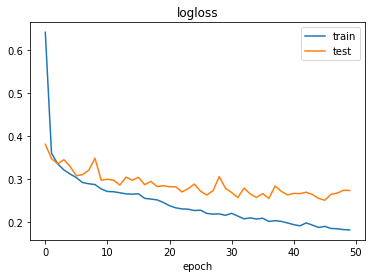

In [50]:
fig = plt.figure()
plt.plot(epoch_train_loss)
plt.plot(epoch_test_loss)
plt.title('logloss')
# plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
fig.show()
# fig.savefig('loss' + postfix + '.pdf')

In [0]:
logits = model(Variable(torch.FloatTensor(X_test)).cuda())
test_proba = F.softmax(logits.cpu()).data.numpy()[:, 1]

In [44]:
print(f'ROC AUC = {roc_auc_score(y_test, test_proba)}')
print(f'log loss = {log_loss(y_test,test_proba)}')
print(f'Matthews correlation coefficient = {matthews_corrcoef(y_test, test_proba > 0.5):.3f}')

ROC AUC = 0.9650194384244923
log loss = 0.24553227996702148
Matthews correlation coefficient = 0.807


### keras net

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import optimizers, losses, metrics, initializers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import keras.backend as K

import tensorflow as tf 
tf.set_random_seed(123)

Using TensorFlow backend.


In [0]:
AMS_metric_cut = 0.2#0.99822

In [0]:
def AMS_cut_tf(cut, prediction, true_labels, sig_sum_w = sig_sum_w, bkgr_sum_w = bkgr_sum_w, br = 0.00000001): #, prediction = prediction_test, true_labels = y_test

    s = K.all(K.stack([K.greater(prediction, cut[0]) , (K.equal(true_labels, 1))], axis=0), axis=0)
    b = K.all(K.stack([K.greater(prediction, cut[0]) , (K.equal(true_labels, 0))], axis=0), axis=0)
    s = K.cast(s, dtype='float32')
    b = K.cast(b, dtype='float32')
    
    
    s_weight = K.constant(sig_sum_w)  / K.sum(K.cast(K.equal(true_labels, 1), dtype='float32'))
    b_weight = K.constant(bkgr_sum_w) / K.sum(K.cast(K.equal(true_labels, 0), dtype='float32'))
    
    s = s * s_weight; b = b * b_weight
    s = K.sum(s); b = K.sum(b)
#     print(s)
#     print(b)
    radicand = 2 *( (s+b+br) * K.log (1.0 + s/(b+br)) - s)
#     if radicand < 0:
#         print('radicand is negative. Exiting')
#         return -1
#     else:
    ams = K.switch(K.greater(s+b, K.constant(10)), K.sqrt(radicand), K.constant(0))
    return ams

def AMS_eval_tf(y_true, y_pred):
    return -AMS_cut_tf([AMS_metric_cut], sig_sum_w = sig_sum_w, bkgr_sum_w = bkgr_sum_w, prediction = y_pred, true_labels = y_true)

In [0]:
def binary_focal_loss(y_true, y_pred):
#     """
#     Binary form of focal loss.
#       FL(p_t) = -alpha * (1 - p_t)**gamma * log(p_t)
#       where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.
#     References:
#         https://arxiv.org/pdf/1708.02002.pdf
#     Usage:
#      model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
#     """
#     def binary_focal_loss_fixed(y_true, y_pred):
    """
    :param y_true: A tensor of the same shape as `y_pred`
    :param y_pred:  A tensor resulting from a sigmoid
    :return: Output tensor.
    """
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))

    epsilon = K.epsilon()
    # clip to prevent NaN's and Inf's
    pt_1 = K.clip(pt_1, epsilon, 1. - epsilon)
    pt_0 = K.clip(pt_0, epsilon, 1. - epsilon)
    
    alpha = 0.001
    gamma = 2.
    
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) \
           -K.sum((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))



In [18]:
_lr = 0.003
optim = optimizers.Adam(lr=_lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)
loss  = losses.binary_crossentropy
w_init = initializers.he_normal(seed=123)
bias_init = initializers.Constant(value=0.01)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=_lr*0.01)
es = EarlyStopping(monitor='val_loss', min_delta=1e-2, patience=30, verbose=0, mode='min', baseline=None, restore_best_weights=False)

num_epochs = 1000
batch_size = 1000

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model = Sequential()
model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05, center=True, scale=True, 
                             beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
          
model.add(Dense(200, input_dim=X_train.shape[1], kernel_initializer=w_init, bias_initializer=bias_init))          
model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05, center=True, scale=True, 
                             beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Activation('relu'))

model.add(Dense(200,kernel_initializer=w_init, bias_initializer=bias_init))       
model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05, center=True, scale=True, 
                             beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
model.add(Activation('relu'))

# model.add(Dense(200,kernel_initializer=w_init, bias_initializer=bias_init))
# model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05, center=True, scale=True, 
#                              beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones'))
# model.add(Activation('relu'))

model.add(Dense(1, activation='sigmoid'))

          
model.compile(loss=loss, #binary_focal_loss
              optimizer=optim,
              metrics=[]) #, 'binary_crossentropy', AMS_eval_tf, 'acc', 

history = model.fit(X_train, y_train,
          epochs=num_epochs,
          callbacks=[reduce_lr, es],
          batch_size=batch_size,
          validation_data=(X_test, y_test)
         )

score = model.evaluate(X_val, y_val, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Train on 44652 samples, validate on 14885 samples
Epoch 1/1000
44652/44652 [==============================] - 7s 148us/step - loss: 0.3832 - val_loss: 0.3322
Epoch 2/1000
44652/44652 [==============================] - 1s 12us/step - loss: 0.3241 - val_loss: 0.3185
Epoch 3/1000
44652/44652 [==============================] - 1s 11us/step - loss: 0.3109 - val_loss: 0.3125
Epoch 4/1000
44652/44652 [==============================] - 1s 12us/step - loss: 0.3022 - val_loss: 0.3107
Epoch 5/1000
44652/44652 [==============================] - 1s 11us/step - loss: 0.2929 - val_loss: 0.2997
Epoch 6/1000
44652/44652 [==============================] - 1s 12us/step - loss: 0.2808 - val_loss: 0.2874
Epoch 7/1000
44652/44652 [==============================] - 1s 11us/step - loss: 0.2728 - val_loss: 0.2817
Epoch 8/1000
44652/44652 [==============================] - 1s 11us/step - loss: 0.2659 - val_loss: 0.2779
Epoch 9/1000
44652/44652 [===================

In [20]:
test_proba = model.predict(X_test)[:, 0]

print(f'ROC AUC = {roc_auc_score(y_test, test_proba)}')
print(f'log loss = {log_loss(y_test,test_proba)}')
print(f'Matthews correlation coefficient = {matthews_corrcoef(y_test, test_proba > 0.5):.3f}')

ROC AUC = 0.965874092895489
log loss = 0.23844307306617965
Matthews correlation coefficient = 0.810


dict_keys(['val_loss', 'loss', 'lr'])


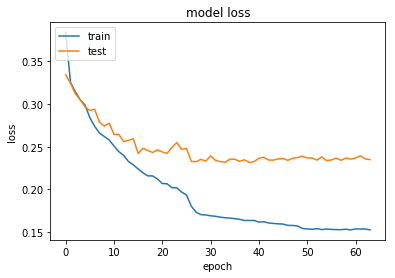

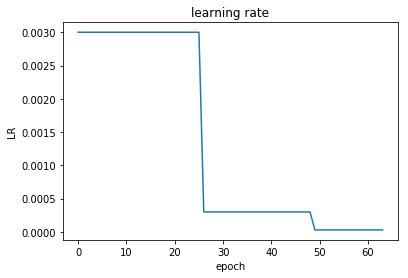

In [55]:
print(history.history.keys())

# postfix = 'CEL'#'_FL_p1'
# # summarize history for accuracy
# fig = plt.figure()
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('accuracy')
# # plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# fig.show()
# # fig.savefig('acc' + postfix + '.pdf')

# summarize history for loss
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('logloss')
# plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
fig.show()
# fig.savefig('loss' + postfix + '.pdf')

# # summarize history for AMS
# fig = plt.figure()
# plt.plot(history.history['AMS_eval_tf'])
# plt.plot(history.history['val_AMS_eval_tf'])
# plt.title('AMS')
# # plt.ylabel('AMS')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# # plt.ylim((-2,-1.5))
# fig.show()
# # fig.savefig('AMS' + postfix + '.pdf')

# learning rate
fig = plt.figure()
plt.plot(history.history['lr'])
plt.title('learning rate')
# plt.ylabel('LR')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
fig.show()
# fig.savefig('LR' + postfix + '.pdf')

In [0]:
score = model.evaluate(X_val, y_val, batch_size=batch_size)
score

14885/14885 [==============================] - 0s 4us/step


[149.83467346539945, 0.8614040930518617, 1.073493946307371]

#### **AMS opt**

In [0]:
sig_sum_w = 100; bkgr_sum_w = 100000; 

In [0]:
def AMS_cut(cut, prediction, true_labels, sig_sum_w = sig_sum_w, bkgr_sum_w = bkgr_sum_w, br = 0.00000001): #, prediction = prediction_test, true_labels = y_test

    s = np.array((prediction > cut[0]) * (true_labels == 1), dtype='float32')
    b = np.array((prediction > cut[0]) * (true_labels == 0), dtype='float32')

    s_weight = sig_sum_w  / np.argwhere(true_labels == 1).shape[0]
    b_weight = bkgr_sum_w / np.argwhere(true_labels == 0).shape[0]

    s *= s_weight; b *= b_weight
    s = sum(s); b = sum(b)
#     print(s_weight, b_weight)
#     print(s)
#     print(b)
    radicand = 2 *( (s+b+br) * math.log (1.0 + s/(b+br)) - s)
#     if radicand < 0:
#         print('radicand is negative. Exiting')
#         return -1
#     else:
    ams = math.sqrt(radicand) if s+b > 10 else 0
    return ams

In [0]:
def optimize_me(domain, prediction, true_labels, sig_sum_w=sig_sum_w, bkgr_sum_w = bkgr_sum_w, n_iter = 10):
    optimizer = BayesianOptimization(f= lambda x: AMS_cut(x, prediction = prediction, true_labels = true_labels, sig_sum_w = sig_sum_w, bkgr_sum_w = bkgr_sum_w), 
    #                                  some_metric_cut,
                                     domain=domain,
                                     model_type='GP',
                                     acquisition_type ='MPI',
    #                                  n_samples = 5,
                                     evaluator_type = 'local_penalization',
                                     initial_design_numdata = 30,
                                     initial_design_type='sobol',
                                     batch_size = 1,
                                     acquisition_jitter = 0.005,
                                     exact_feval = True, 
                                     maximize = True,
                                     num_cores = 2)

    # Only 20 iterations because we have 5 initial random points

    # optimizer.run_optimization(max_iter=5, max_time=180, eps=1e-6, verbosity=True, context={'n_estimators':10})
    optimizer.run_optimization(max_iter=n_iter, max_time=1800, eps=1e-6, verbosity=True) 
    return optimizer

In [24]:
domain = [
    {'name': 'cut', 'type': 'continuous', 'domain': (0.7, 0.999)}
  ]

optimizer = optimize_me(domain, test_proba, y_test, n_iter = 20)

num acquisition: 1, time elapsed: 0.49s
num acquisition: 2, time elapsed: 0.97s
num acquisition: 3, time elapsed: 1.50s
num acquisition: 4, time elapsed: 1.97s
num acquisition: 5, time elapsed: 2.46s
num acquisition: 6, time elapsed: 2.93s
num acquisition: 7, time elapsed: 3.46s
num acquisition: 8, time elapsed: 3.90s
num acquisition: 9, time elapsed: 4.31s
num acquisition: 10, time elapsed: 4.79s
num acquisition: 11, time elapsed: 5.32s
num acquisition: 12, time elapsed: 5.73s
num acquisition: 13, time elapsed: 6.14s
num acquisition: 14, time elapsed: 6.56s
num acquisition: 15, time elapsed: 7.03s
num acquisition: 16, time elapsed: 7.78s
num acquisition: 17, time elapsed: 8.46s
num acquisition: 18, time elapsed: 9.27s
num acquisition: 19, time elapsed: 10.00s
num acquisition: 20, time elapsed: 10.62s


Bayesian optimization score = 1.84


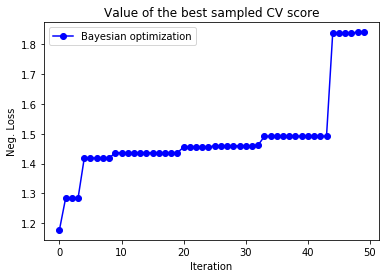

In [25]:
# y_rs = np.maximum.accumulate(rs.cv_results_['mean_test_score'])
y_bo = np.maximum.accumulate(-optimizer.Y).ravel()

# print(f'Baseline neg. MSE = {baseline:.2f}')
# print(f'Random search = {y_rs[-1]:.2f}')
print(f'Bayesian optimization score = {y_bo[-1]:.2f}')

# plt.plot(y_rs, 'ro-', label='Random search')
plt.plot(y_bo, 'bo-', label='Bayesian optimization')
plt.xlabel('Iteration')
plt.ylabel('Neg. Loss')
# plt.ylim(-5000, -3000)
plt.title('Value of the best sampled CV score');
plt.legend();


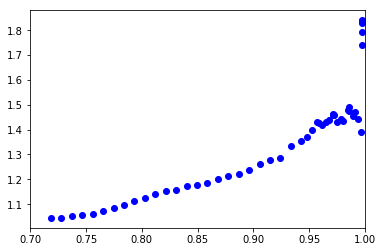

In [26]:
plt.plot(optimizer.X, -optimizer.Y, 'bo')
plt.xlim(0.7, 1.)
plt.show()

In [27]:
print(f'best signif. = {max(-optimizer.Y_best)} for cut = {optimizer.x_opt[0]:.5f}')

best signif. = 1.8399509662674232 for cut = 0.99705


In [0]:
_f= lambda x: AMS_cut(x, prediction = test_proba, true_labels = y_test, sig_sum_w = sig_sum_w, bkgr_sum_w = bkgr_sum_w)

In [30]:
_s = (test_proba > 0.997) & (y_test == 1)
_b = (test_proba > 0.997) & (y_test == 0)

s_weight = sig_sum_w  / np.argwhere(y_test == 1).shape[0]
b_weight = bkgr_sum_w / np.argwhere(y_test == 0).shape[0]
_s = np.array(_s, dtype='int') * s_weight; _b = np.array(_b, dtype='int') * b_weight

sum(_s), sum(_b)

(19.779629131953776, 147.78986967620585)